In [2]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class Environment():
    
    def __init__(self, name, bReplay=True):
        envids = [spec.id for spec in gym.envs.registry.all()]
        if(name in envids):
            self.gym_env = gym.make(name)
            self.action_space = self.gym_env.action_space

        self.bReplay = bReplay
        
        #The environment stores a bunch of ueful data in a variable called history. 
        self.history = {}
        self.history["nepisodes"] = 0
        self.history["rewards"] = []
        self.history["episode_rew"] = []
        self.history["episode_time"] = []

    def reset(self):
        self.t = 0
        self.episode_rew = 0
        return self.gym_env.reset()
        
    #s - the agent is returning an individual state here(s).
    def step(self, action):
        # is also returning the reward. 
        [obs, reward, done, info] = self.gym_env.step(action)
        self.t += 1
        self.episode_rew += reward

        if(self.bReplay):
             self.history["rewards"] += [reward]
        
        if(done):
            self.history["nepisodes"] += 1
            self.history["episode_time"] += [self.t]
            self.history["episode_rew"] += [self.episode_rew]

        return [obs, reward, done, info]

    def close(self):
        self.gym_env.close()

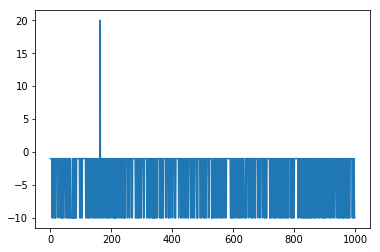

In [13]:
#The rewards are in the history of the environment.
plt.plot(env.history["rewards"])

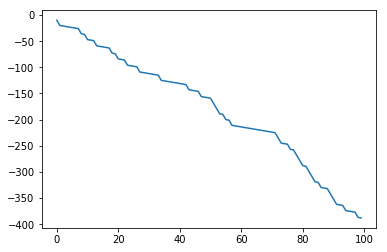

In [6]:
plt.plot(np.cumsum(env.history["rewards"]))

0


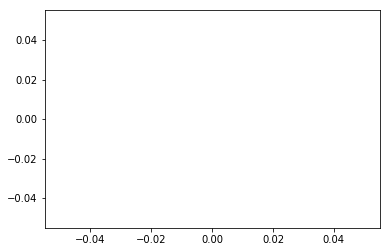

In [7]:
print(env.history["nepisodes"])
plt.plot(env.history["episode_time"])

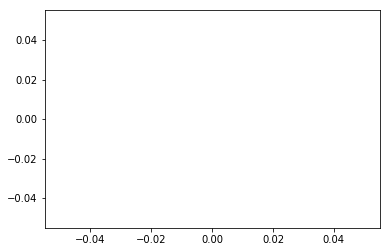

In [8]:
plt.plot(env.history["episode_rew"])

In [9]:
def normalize(x):
    xmin,xmax = np.min(x),np.max(x)
    return [(np.array(x) - xmin) / (xmax-xmin), xmin, xmax]

nvalues 25 min: -911.000000 max -447.000000


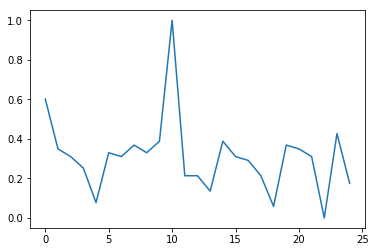

In [9]:
nmm = normalize(env.history["episode_rew"])
print("nvalues %d min: %f max %f"%(len(nmm[0]),nmm[1],nmm[2]))
plt.plot(nmm[0])

In [10]:
def plot_history(history, smoothing_window = 100):
    nmm = normalize(history["episode_rew"])
    plt.plot(nmm[0],label='Episode Reward - [%f...%f]'%(nmm[1],nmm[2]))
    
    nmm = normalize(history["episode_time"])
    plt.plot(nmm[0],label='Episode Duration - [%f...%f]'%(nmm[1],nmm[2]))
    lgd = plt.legend(bbox_to_anchor=(1.05, 0.6),loc=0)
    plt.show()

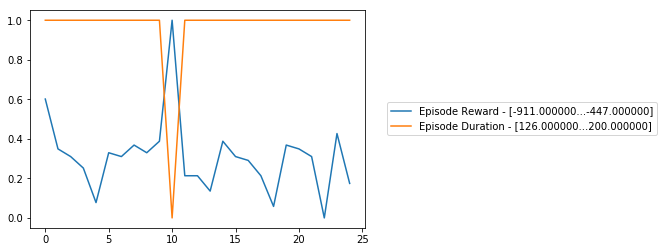

In [11]:
plot_history(env.history)